### Multiple linear regression

### Multiple Predictors and single target
### y ~ x1, x2, x3, ... , xn


In [1]:
# ignore non harmful warnings
from warnings import filterwarnings

filterwarnings("ignore")

### Step 1 - data injection


In [2]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#### PROFIT ~ RND, ADMIN, MKT

## Step 2 -Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

#### Step 3 Vizulization

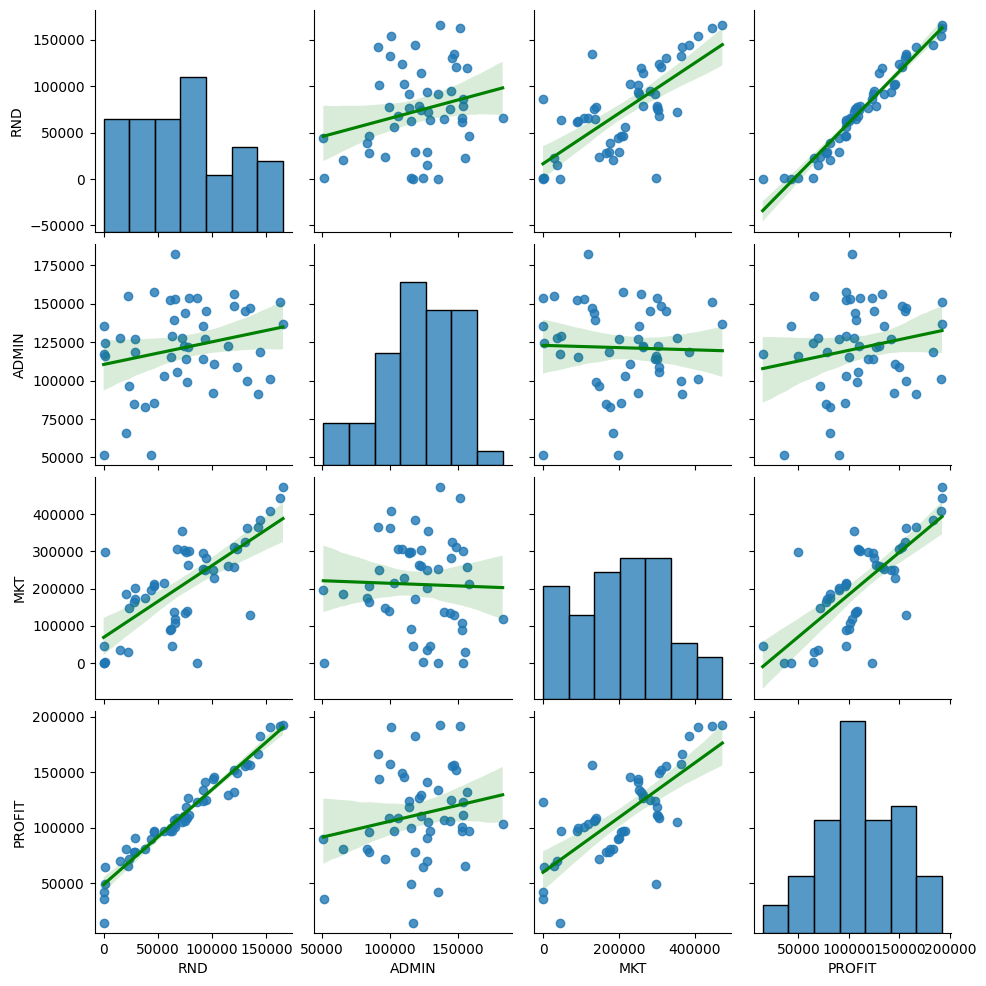

In [12]:
import seaborn as sns

sns.pairplot(df, kind="reg", plot_kws={"line_kws": {"color": "Green"}})

 #### Step 4 - Seperate X and Y(PROFIT)

In [13]:
X = df[["RND", "ADMIN", "MKT"]]

In [15]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [16]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


#### Step 5 - Build linear regression model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
model.intercept_

array([50122.19298987])

In [21]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [22]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [24]:
coefs = pd.Series(model.coef_.flatten())
coefs

0    0.805715
1   -0.026816
2    0.027228
dtype: float64

<Axes: >

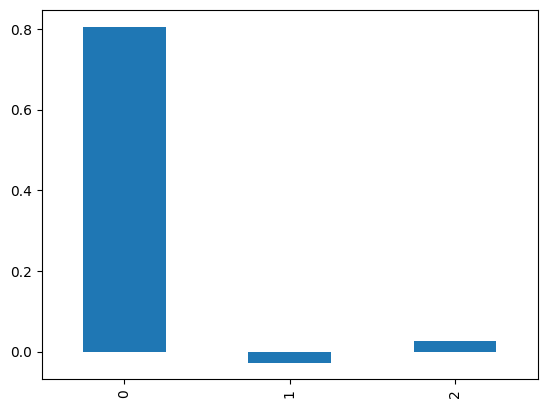

In [25]:
coefs.plot(kind="bar")

### Fitted Equation

### Following conclusions
##### if RND increases by 1 unit Profit will increase 0.8057
##### if ADMIN increase by 1 unit Profit will decrease by 0.0268
 #### if MKT increases by 1 unit Profit will increase by 0.0272
### For increasing Profit RND budget is more important compared to other

### Step 6 - Model Evaluation

In [27]:
model.score(X, Y)

0.9507459940683246

In [28]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [29]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [30]:
def evaluate_model(model, x, y):
    # Predict results for x
    ypred = model.predict(x)
    # Calcualte different metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [31]:
evaluate_model(model, X, Y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 : 95.07%


### R2 > 0.8 hence model is considered to be a good model


### Step 7 - Out of Sample prediction

In [33]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [34]:
rnd = 1_50_000
admin = 20_000
mkt = 30_000

xnew = [[rnd, admin, mkt]]

profit_pred = model.predict(xnew)
profit_pred

array([[171259.97305336]])